In [2]:
import sys
!{sys.executable} -m pip install --user pandas seaborn numpy matplotlib plotly scikit-learn


✅ Data loaded successfully. Shape: (569, 31)


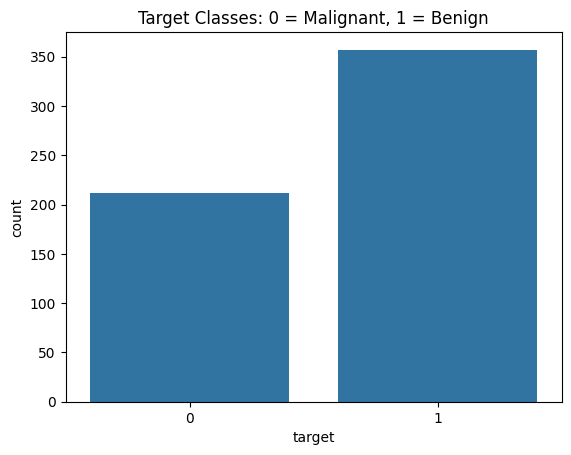


✅ Accuracy: 0.9649122807017544

✅ Confusion Matrix:
 [[40  3]
 [ 1 70]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import plotly.io as pio
pio.renderers.default = 'iframe_connected'

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print("✅ Data loaded successfully. Shape:", df.shape)


sns.countplot(x='target', data=df)
plt.title('Target Classes: 0 = Malignant, 1 = Benign')
plt.show()

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))


probs = model.predict_proba(X_test_scaled)[:, 1]
fig = px.histogram(probs, nbins=50, title="Prediction Probabilities (Benign Class)",
                   labels={"value": "Probability", "count": "Frequency"})
fig.show()